# Video Game Popularity: Preprocessing and Training

The goal of this notebook is to prepare data for fitting model developement.

We will be creating dummy variable for our categorical data. We did some of this in the EDA notebook, but only for certain columns as it was too large for visualizing. We will also need the version of the Steam Tags data set, where we converted it to boolean rather than counts, recall our threshold for determining this was 75% of the maximum of the tags for each video games.


In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import requests
import numpy as np
import matplotlib.pyplot as plt

We saw in EDA that our first data set wasn't as informative as the other two data sets, so here we plan to focus on those two instead. So to start off let's look at:

## 2019 Video Game Sales

In this set, we filtered "most popular" games by sales, and then we saw a corrilation between sales and critic scores. So we can use one or the other as our dependant variable.

In [2]:
vg_sales_2019 = pd.read_csv(r"./csv_files/vg_2019_w_scores_clean.csv", index_col=0)
vg_sales_2019.isna().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating          0
Platform             0
Publisher            0
Developer            0
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
Vgchartzscore    54993
dtype: int64

In [3]:
vg_sales_2019.shape

(55792, 17)

Dropping the columns with less than 1000 data points

In [4]:
vg_sales_2019.drop(columns=['User_Score', 'Vgchartzscore', ], inplace=True)

Modern gaming

In [5]:
vg_sales_2019 = vg_sales_2019[vg_sales_2019['Year']>2000]
print(vg_sales_2019.shape)
vg_sales_2019.isna().sum()

(40807, 15)


Rank                 0
Name                 0
Genre                0
ESRB_Rating          0
Platform             0
Publisher            0
Developer            0
Critic_Score     35018
Total_Shipped    39262
Global_Sales     23606
NA_Sales         29204
PAL_Sales        29058
JP_Sales         34768
Other_Sales      27139
Year                 0
dtype: int64

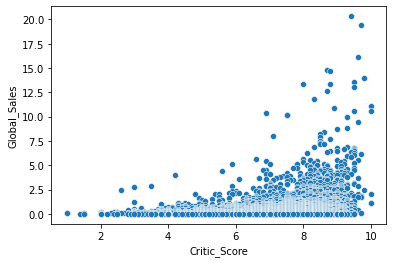

In [6]:
_ = sns.scatterplot(data=vg_sales_2019, x='Critic_Score', y='Global_Sales')
plt.show()

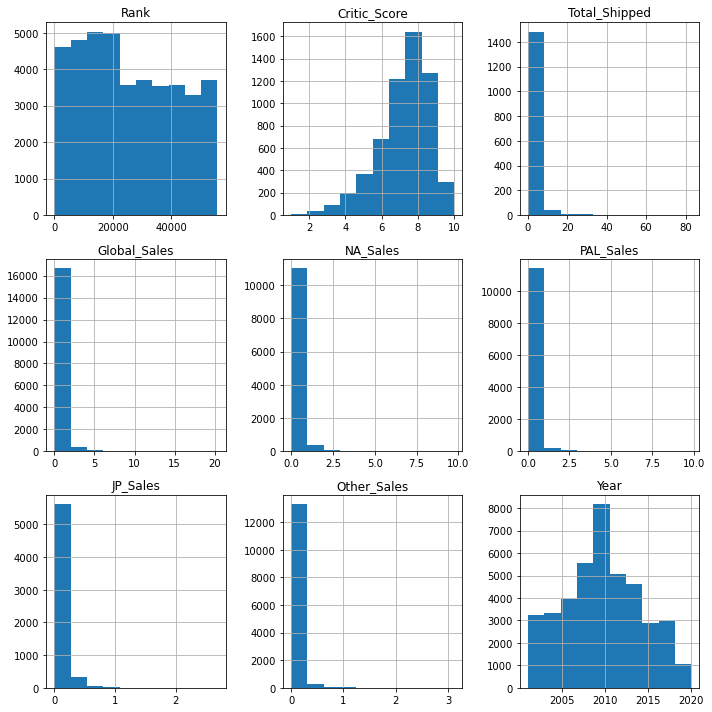

In [7]:
vg_sales_2019.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [8]:
vg_sales_2019['Critic_Score'].fillna(value=vg_sales_2019['Critic_Score'].median(), inplace=True)
vg_sales_2019['Total_Shipped'].fillna(value=vg_sales_2019['Total_Shipped'].median(), inplace=True)
vg_sales_2019['Global_Sales'].fillna(value=vg_sales_2019['Global_Sales'].median(), inplace=True)
vg_sales_2019['NA_Sales'].fillna(value=vg_sales_2019['NA_Sales'].median(), inplace=True)
vg_sales_2019['PAL_Sales'].fillna(value=vg_sales_2019['PAL_Sales'].median(), inplace=True)
vg_sales_2019['JP_Sales'].fillna(value=vg_sales_2019['JP_Sales'].median(), inplace=True)
vg_sales_2019['Other_Sales'].fillna(value=vg_sales_2019['Other_Sales'].median(), inplace=True)
vg_sales_2019.isna().shape

(40807, 15)

In [9]:
vg_sales_2019.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,82.86,0.11,0.11,0.04,0.04,0.01,2006.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,37.14,0.11,0.11,0.04,0.04,0.01,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,E,PC,Other,Other,7.5,36.60,0.11,0.11,0.04,0.04,0.01,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,33.09,0.11,0.11,0.04,0.04,0.01,2009.0
6,7,New Super Mario Bros.,Platform,E,DS,Nintendo,Nintendo EAD,9.1,30.80,0.11,0.11,0.04,0.04,0.01,2006.0


In [10]:
vg_sales_2019_dummies = pd.get_dummies(vg_sales_2019, columns=['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer'])
vg_sales_2019_dummies.shape

(40807, 267)

Next we need to decide what will be our dependent variable. (Note: We could change this based on what the company would prefer.) In this case we could choose from any of the sales or score columns, for this notebook we will use Critic Score.

Then we will need to determine what our independent variables are. These are the features we have control over. Another way of viewing this is what do we need to drop since they are not independent, or we don't have control of them. In this case we will be looking at the other sales data, score, and critic/user counts as columns that we need to drop, as we don't have control over those numbers.

In [11]:
vg_sales_2019_dummies.drop(columns=['NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)
vg_y = vg_sales_2019_dummies['Critic_Score']
vg_x = vg_sales_2019_dummies.drop(columns=['Critic_Score', 'Name'])

In [12]:
x_vg_train, x_vg_test, y_vg_train, y_vg_test = train_test_split(vg_x, vg_y, test_size=.3)

In [13]:
vg_scaler = StandardScaler()
vg_scaler = vg_scaler.fit(x_vg_train)
x_vg_train = vg_scaler.transform(x_vg_train)
x_vg_test = vg_scaler.transform(x_vg_test)

In [14]:
pd.DataFrame(x_vg_train).to_csv("./preprocessed_data/x_vg_train.csv")
pd.DataFrame(y_vg_train).to_csv("./preprocessed_data/y_vg_train.csv")
pd.DataFrame(x_vg_test).to_csv("./preprocessed_data/x_vg_test.csv")
pd.DataFrame(y_vg_test).to_csv("./preprocessed_data/y_vg_test.csv")

## Steam Tag Data

We are going to quickly make the edits we did in EDA again

Unfortunately this dataset appears to be too large for my computer to handle, so I'm implementing a few solutions to try and cut down its size:
- Dropping 'categories', 'genres', 'steamspy_tags' as redundant information with tags
- Combining 'positive_ratings', 'negative_ratings' as percent positive ratings and dropping these columns
- 'owners' because it's not something we have control over, however we could use it to determine popularity, so if it weren't for space we could utilize this
- 'average_playtime', we determined the median was a better representation of playtime, so we can drop this column.
- 'platform' since we saw in EDA that it was associated with the modern technology at the time.
- 'developer' we're goin to drop this column because we will assume that we are the developer of the game, and that will mean we just need to find a publisher for the game. this will help cut redundant information as well as often we see developer and publisher as the same, though this is not always true.
- According to History.com the "Modern Age of Gaming" started around 2005, so we will drop data from before 2000

In [15]:
tags_tf = pd.read_csv("./csv_files/boolean_tags.csv", index_col='appid')
tags_tf

,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,4_player_local,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1065650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
tags_tf.sum().sort_values(ascending=True).head(10)

hardware            575
tutorial            575
transhumanism       575
nsfw                575
parody_             575
party_based_rpg     575
pool                575
pve                 575
based_on_a_novel    575
crowdfunded         575
dtype: int64

I was hoping above if we could delete any of the columns from the tag data, but as we see even the tags that are used the least still represent around 2% of our data

In [17]:
steam_data_2019 = pd.read_csv("./csv_files/steam_data.csv",index_col='appid')
steam_data_2019['rating_percent_pos'] = steam_data_2019['positive_ratings']/(steam_data_2019['negative_ratings'] + steam_data_2019['positive_ratings'])
steam_data_2019['release_date'] = pd.to_datetime(steam_data_2019['release_date'])
steam_data_2019 = steam_data_2019[steam_data_2019['release_date']>= '2000']
steam_data_2019.head()

,name,release_date,english,developer,publisher,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating_percent_pos
appid,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,124534,3339,17612,317,10000000-20000000,7.19,0.973888
30,Day of Defeat,2003-05-01,1,Valve,Valve,0,0,3416,398,187,34,5000000-10000000,3.99,0.895648
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,0,1273,267,258,184,5000000-10000000,3.99,0.826623
60,Ricochet,2000-11-01,1,Valve,Valve,0,0,2758,684,175,10,5000000-10000000,3.99,0.801278
80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,0,0,12120,1439,427,43,10000000-20000000,7.19,0.893871


In [18]:
steam_data_2019.drop(columns=['positive_ratings', 'negative_ratings', 'average_playtime'], inplace=True)

In [19]:
merged_steam_data = pd.merge(
    steam_data_2019,
    tags_tf,
    on='appid',
    sort=True
)

merged_steam_data

,name,release_date,english,developer,publisher,required_age,achievements,median_playtime,owners,price,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
appid,,,,,,,,,,,,,,,,,,,,,
10,Counter-Strike,2000-11-01,1,Valve,Valve,0,0,317,10000000-20000000,7.19,...,0,0,0,0,0,0,0,0,0,0
30,Day of Defeat,2003-05-01,1,Valve,Valve,0,0,34,5000000-10000000,3.99,...,0,0,0,0,0,0,1,0,0,0
40,Deathmatch Classic,2001-06-01,1,Valve,Valve,0,0,184,5000000-10000000,3.99,...,0,0,0,0,0,0,0,0,0,0
60,Ricochet,2000-11-01,1,Valve,Valve,0,0,10,5000000-10000000,3.99,...,0,0,0,0,0,0,0,0,0,0
80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,0,0,43,10000000-20000000,7.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065230,Room of Pandora,2019-04-24,1,Other,Other,0,7,0,0-20000,2.09,...,0,0,0,0,0,0,0,0,0,0
1065570,Cyber Gun,2019-04-23,1,Other,Other,0,0,0,0-20000,1.69,...,0,0,0,0,0,0,0,0,0,0
1065650,Super Star Blast,2019-04-24,1,Other,EntwicklerX,0,24,0,0-20000,3.99,...,0,0,0,0,0,0,0,0,0,0


In [20]:
merged_steam_data.isnull().any(axis = 1).sum()

0

In [21]:
steam_data_dummies = pd.get_dummies(merged_steam_data, columns=['publisher', 'developer'])
steam_data_dummies.shape

(27071, 1480)

Next we need to decide what will be our dependent variable. In this case we could choose from any of the sales or score columns, for this notebook we will use Rating Percent Positive. (rating_percent_pos)

Then we will need to determine what our independent variables are. We don't have control over the number of people who own the game so we will drop the "owners" column. Also there is redundant information between the median and the average play time, since we saw that play times tend to be skewed during the EDA process we will drop the average and use the median instead.

In [22]:
steam_data_dummies.drop(columns=['owners'], inplace=True)
steam_y = steam_data_dummies['rating_percent_pos']
steam_x = steam_data_dummies.drop(columns=['rating_percent_pos', 'name', 'release_date'])

In [23]:
x_steam_train, x_steam_test, y_steam_train, y_steam_test = train_test_split(steam_x, steam_y, test_size=.3)

steam_scaler = StandardScaler()
steam_scaler = steam_scaler.fit(x_steam_train)
x_steam_train = steam_scaler.transform(x_steam_train)
x_steam_test = steam_scaler.transform(x_steam_test)

pd.DataFrame(x_steam_train).to_csv("./preprocessed_data/x_steam_train.csv")
pd.DataFrame(y_steam_train).to_csv("./preprocessed_data/y_steam_train.csv")
pd.DataFrame(x_steam_test).to_csv("./preprocessed_data/x_steam_test.csv")
pd.DataFrame(y_steam_test).to_csv("./preprocessed_data/y_steam_test.csv")

## Merging Sales and Steam Data

In the previous notebooks we looked at these two data sets seperately as we did above, and that is because there is only 937 entries that are in both data sets

In [24]:
merged_sales_steam_data = pd.merge(
    merged_steam_data,
    vg_sales_2019,
    left_on = 'name',
    right_on='Name',
    sort=True
)

merged_sales_steam_data

,name,release_date,english,developer,publisher,required_age,achievements,median_playtime,owners,price,...,Publisher,Developer,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,.hack//G.U. Last Recode,2017-11-03,1,Other,BANDAI NAMCO Entertainment,0,52,85,50000-100000,39.99,...,Namco Bandai Games,CyberConnect2,7.5,0.44,0.24,0.10,0.04,0.08,0.03,2017.0
1,.hack//G.U. Last Recode,2017-11-03,1,Other,BANDAI NAMCO Entertainment,0,52,85,50000-100000,39.99,...,Namco Bandai Games,CyberConnect2,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2018.0
2,"10,000,000",2013-01-15,1,Other,Other,0,14,414,100000-200000,3.99,...,Unknown,Other,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2018.0
3,1001 Spikes,2014-06-03,1,Other,"Nicalis, Inc.",0,25,215,50000-100000,9.99,...,Other,Other,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2014.0
4,12 Labours of Hercules,2015-03-23,1,Other,Jetdogs Studios,0,22,349,100000-200000,1.99,...,Other,Other,7.5,0.16,0.11,0.11,0.04,0.04,0.01,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,iRacing,2015-01-12,1,Other,Other,0,0,4,20000-50000,7.99,...,Unknown,Unknown,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2008.0
5623,nail'd,2010-11-30,1,Other,Deep Silver,0,0,210,100000-200000,3.99,...,Deep Silver,Other,7.5,0.44,0.12,0.08,0.02,0.04,0.02,2010.0
5624,nail'd,2010-11-30,1,Other,Deep Silver,0,0,210,100000-200000,3.99,...,Deep Silver,Other,7.5,0.44,0.10,0.08,0.02,0.04,0.01,2010.0
5625,nail'd,2010-11-30,1,Other,Deep Silver,0,0,210,100000-200000,3.99,...,Deep Silver,Other,7.5,0.44,0.01,0.11,0.01,0.04,0.00,2010.0


Dropping redundant information

In [25]:
merged_sales_steam_data.drop(columns=['Publisher', 'Developer', 'release_date', 'Name', 'Genre'], inplace= True)

In [26]:
merged_sales_steam_data.isnull().any(axis = 1).sum()

0

In [27]:
merged_sales_steam_data.drop_duplicates(subset= ['name', 'Year'], inplace=True, ignore_index=True)
merged_sales_steam_data

,name,english,developer,publisher,required_age,achievements,median_playtime,owners,price,rating_percent_pos,...,ESRB_Rating,Platform,Critic_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,.hack//G.U. Last Recode,1,Other,BANDAI NAMCO Entertainment,0,52,85,50000-100000,39.99,0.877409,...,T,PS4,7.5,0.44,0.24,0.10,0.04,0.08,0.03,2017.0
1,.hack//G.U. Last Recode,1,Other,BANDAI NAMCO Entertainment,0,52,85,50000-100000,39.99,0.877409,...,T,PC,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2018.0
2,"10,000,000",1,Other,Other,0,14,414,100000-200000,3.99,0.893750,...,E,PC,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2018.0
3,1001 Spikes,1,Other,"Nicalis, Inc.",0,25,215,50000-100000,9.99,0.815412,...,T,Other,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2014.0
4,12 Labours of Hercules,1,Other,Jetdogs Studios,0,22,349,100000-200000,1.99,0.938751,...,E,PC,7.5,0.16,0.11,0.11,0.04,0.04,0.01,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,iBomber Defense,1,Other,Cobra Mobile,0,22,112,50000-100000,2.99,0.743719,...,E,PC,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2011.0
3668,iBomber Defense Pacific,1,Other,Cobra Mobile,0,25,108,200000-500000,2.99,0.833663,...,E,PC,7.5,0.10,0.11,0.11,0.04,0.04,0.01,2012.0
3669,iRacing,1,Other,Other,0,0,4,20000-50000,7.99,0.842165,...,E,Other,7.5,0.44,0.11,0.11,0.04,0.04,0.01,2008.0
3670,nail'd,1,Other,Deep Silver,0,0,210,100000-200000,3.99,0.798327,...,T,PS3,7.5,0.44,0.12,0.08,0.02,0.04,0.02,2010.0


Dependent variable: rating_percent_pos (Note we could choose any of the other options we considered previously)

Dropping: 'owners','NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score'

In [28]:
merged_sales_steam_data.select_dtypes(exclude=[np.number])

,name,developer,publisher,owners,ESRB_Rating,Platform
0,.hack//G.U. Last Recode,Other,BANDAI NAMCO Entertainment,50000-100000,T,PS4
1,.hack//G.U. Last Recode,Other,BANDAI NAMCO Entertainment,50000-100000,T,PC
2,"10,000,000",Other,Other,100000-200000,E,PC
3,1001 Spikes,Other,"Nicalis, Inc.",50000-100000,T,Other
4,12 Labours of Hercules,Other,Jetdogs Studios,100000-200000,E,PC
...,...,...,...,...,...,...
3667,iBomber Defense,Other,Cobra Mobile,50000-100000,E,PC
3668,iBomber Defense Pacific,Other,Cobra Mobile,200000-500000,E,PC
3669,iRacing,Other,Other,20000-50000,E,Other
3670,nail'd,Other,Deep Silver,100000-200000,T,PS3


In [29]:
merged_sales_steam_data.drop(columns=['owners','NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score'], inplace=True)
merged_sales_steam_data =  pd.get_dummies(merged_sales_steam_data, columns=['developer', 'publisher', 'ESRB_Rating', 'Platform'])
merged_y = merged_sales_steam_data['rating_percent_pos']
merged_x = merged_sales_steam_data.drop(columns=['rating_percent_pos', 'name'])

In [30]:
x_merged_train, x_merged_test, y_merged_train, y_merged_test = train_test_split(merged_x, merged_y, test_size=.3)

merged_scaler = StandardScaler()
merged_scaler = merged_scaler.fit(x_merged_train)
x_merged_train = merged_scaler.transform(x_merged_train)
x_merged_test = merged_scaler.transform(x_merged_test)

pd.DataFrame(x_merged_train).to_csv("./preprocessed_data/x_merged_train.csv")
pd.DataFrame(y_merged_train).to_csv("./preprocessed_data/y_merged_train.csv")
pd.DataFrame(x_merged_test).to_csv("./preprocessed_data/x_merged_test.csv")
pd.DataFrame(y_merged_test).to_csv("./preprocessed_data/y_mergerd_test.csv")